In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
#import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
#import xesmf as xe
from matplotlib.colors import LogNorm
import xgcm


In [2]:
from scipy.interpolate import griddata
from scipy.interpolate import interp2d


In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 12,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (15,6)})


In [4]:
dir_topo = '/central/groups/oceanphysics/anirban/global_topog/'
dir_ll1815 = '/central/groups/oceanphysics/anirban/ll181502/grid_ll1815/'
dir_bathy = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'
dir_ll3630 = '/central/groups/oceanphysics/anirban/3630_grid/'


In [5]:
bathy = np.fromfile(open(dir_bathy+'bathy.bin', 'rb'), '>f4')
bathy.shape = (532,1815)
bathy.shape

(532, 1815)

In [6]:
delY = np.fromfile(open(dir_bathy+'delYFile', 'rb'), '>f4')
delY.shape

(532,)

-5.958299999999397

In [29]:
np.sum(delY)+26.855

43.470093231201176

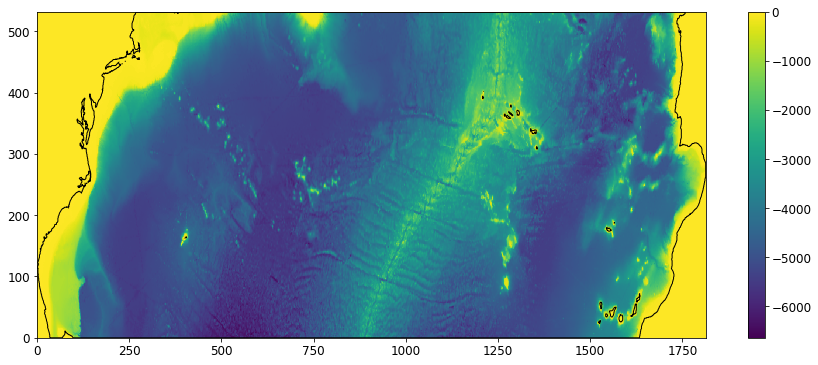

In [7]:
plt.pcolormesh(bathy);plt.colorbar()
plt.contour(bathy,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(1,))

In [8]:
ds_ll1815 = xmitgcm.open_mdsdataset(dir_ll1815,iters=None,default_dtype='>f4')
ds_ll3630 = xmitgcm.open_mdsdataset(dir_ll3630,iters=None,default_dtype='>f4')


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ll181502/grid_ll1815/. Using default version.
  "in %s. Using default version." % data_dir)


In [8]:
# latmin = min(ds_ll1815.YC.min().values,ds_ll1815.YG.min().values)
# latmax = max(ds_ll1815.YC.max().values,ds_ll1815.YG.max().values)

# lonmin = min(ds_ll1815.XC.min().values,ds_ll1815.XG.min().values)
# lonmax = max(ds_ll1815.XC.max().values,ds_ll1815.XG.max().values)

# print(latmin, latmax, lonmin, lonmax)

In [34]:
ds_ll1815.XG.max(), ds_ll1815.XC.max(), ds_ll1815.XG.min(), ds_ll1815.XC.min()

(<xarray.DataArray 'XG' ()>
 array(-6.000002, dtype=float32), <xarray.DataArray 'XC' ()>
 array(-5.979169, dtype=float32), <xarray.DataArray 'XG' ()>
 array(-81.583336, dtype=float32), <xarray.DataArray 'XC' ()>
 array(-81.5625, dtype=float32))

In [46]:
-81.5833+ (1/24)/np.cos(np.deg2rad(ds_ll1815.YC.mean().values))*1480

-5.900218720492774

In [35]:
-81.5833+ 0.041666666666667*1815

-5.958299999999397

In [25]:
ds_ll1815.YG.max(), ds_ll1815.YC.max(), ds_ll1815.YG.min(), ds_ll1815.YC.min()

(<xarray.DataArray 'YG' ()>
 array(43.44225, dtype=float32), <xarray.DataArray 'YC' ()>
 array(43.456318, dtype=float32), <xarray.DataArray 'YG' ()>
 array(26.855293, dtype=float32), <xarray.DataArray 'YC' ()>
 array(26.87238, dtype=float32))

In [30]:
1/24*400+26.855

43.52166666666666

In [47]:
40*37

1480

In [15]:
(1/48)/np.cos(np.deg2rad(ds_ll1815.YC.mean().values))

0.02556860854037406

In [10]:
(1/24)/np.cos(np.deg2rad(ds_ll1815.YC.mean().values))

0.05113721708074812

In [8]:
ds_ll1815.YC.mean().values

array(35.43229, dtype=float32)

In [10]:
ds_topo = xr.open_dataset(dir_topo+'SRTM15+V2.nc')
ds_topo

<xarray.Dataset>
Dimensions:  (lat: 43200, lon: 86400)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 89.99 90.0
Data variables:
    z        (lat, lon) float64 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        
    history:      grdblend blend_input.txt -r -Co -R-180/180/-90/90 -I15s -V ...
    description:  
    GMT_version:  5.4.5 [64-bit]
    node_offset:  1

In [12]:
shape0 = depth_orig.shape
print(shape0)

(4320, 18480)


In [13]:
depth_orig.shape

(4320, 18480)

In [51]:
depth_orig.shape, x_orig.shape, y_orig.shape

((4320, 18480), (18480,), (4320,))

In [ ]:
%%time

xx_0, yy_0 = np.meshgrid(x_orig, y_orig)


data = depth_orig.ravel()[~np.isnan(depth_orig.ravel())]
xpts = xx_0.ravel()[~np.isnan(depth_orig.ravel())]
ypts = yy_0.ravel()[~np.isnan(depth_orig.ravel())]

depth_filled = griddata((xpts, ypts), data, (xx_0,yy_0), method='linear')


In [ ]:
xgOrigin=-81.583335876464844,
dxSpacing=0.02083333333,
ygOrigin=26.855293273925781,

# Now we have to coarsen this by different factors

This data is at 15 seconds resolution. Which is $1/4 \times 1/60 ^{\circ}$ ($=1/240 ^{\circ}$). We now need 4 different resolutions $1/12^{\circ}$, $1/24^{\circ}$, $1/48^{\circ}$ and $1/96^{\circ}$, which correspond to coarsening by factors 20, 10, 5 and 2.5 respectively.
We will call those the 8km, 4km, 2km, and 1km respectively.

There is however one more issue. The $\delta y$ for our case would be different from this, to keep our grid cells square.
We will address this later by interpolating.
The other thing that we have to address is the fact that this data has mountains. We have to set all positive values to zero.

In [52]:
coarseness = 20
shape = np.array(depth_orig.shape, dtype=float)
new_shape = (coarseness * np.ceil(shape / coarseness)).astype(int)
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
tmpx = x_orig.reshape((new_shape[1] // coarseness, coarseness))
tmpy = y_orig.reshape((new_shape[0] // coarseness, coarseness))

depth_8km = np.mean(temp, axis=(1,3))
x_8km = np.mean(tmpx, axis=1)
y_8km = np.mean(tmpy, axis=1)

In [53]:
coarseness = 10
shape = np.array(depth_orig.shape, dtype=float)
new_shape = (coarseness * np.ceil(shape / coarseness)).astype(int)
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
tmpx = x_orig.reshape((new_shape[1] // coarseness, coarseness))
tmpy = y_orig.reshape((new_shape[0] // coarseness, coarseness))

depth_4km = np.mean(temp, axis=(1,3))
x_4km = np.mean(tmpx, axis=1)
y_4km = np.mean(tmpy, axis=1)

In [54]:
coarseness = 5
shape = np.array(depth_orig.shape, dtype=float)
new_shape = (coarseness * np.ceil(shape / coarseness)).astype(int)
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
tmpx = x_orig.reshape((new_shape[1] // coarseness, coarseness))
tmpy = y_orig.reshape((new_shape[0] // coarseness, coarseness))

depth_2km = np.mean(temp, axis=(1,3))
x_2km = np.mean(tmpx, axis=1)
y_2km = np.mean(tmpy, axis=1)

# coarseness = 2.5
The way we do it is: coarsen the original by 2 and then hope for the best.

In [55]:
coarseness = 2
shape = np.array(depth_orig.shape, dtype=float)
new_shape = (coarseness * np.ceil(shape / coarseness)).astype(int)
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
tmpx = x_orig.reshape((new_shape[1] // coarseness, coarseness))
tmpy = y_orig.reshape((new_shape[0] // coarseness, coarseness))

depth_1km = np.mean(temp, axis=(1,3))
x_1km = np.mean(tmpx, axis=1)
y_1km = np.mean(tmpy, axis=1)

In [56]:
depth_8km.shape, depth_4km.shape, depth_2km.shape, depth_1km.shape

((216, 924), (432, 1848), (864, 3696), (2160, 9240))

In [133]:
x_8km.shape, x_4km.shape, x_2km.shape, x_1km.shape, y_8km.shape, y_4km.shape, y_2km.shape, y_1km.shape,


((924,), (1848,), (3696,), (9240,), (216,), (432,), (864,), (2160,))

In [57]:
f_4km = interp2d(x_4km,y_4km, depth_4km, kind='linear', copy=True, fill_value=None)
depth_4km_i = f_4km(ds_ll1815.XC.values, ds_ll1815.YC.values)

In [136]:
depth_4km_i

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan, 162.67170534],
       [         nan,          nan,          nan, ...,          nan,
                 nan, 257.84661427],
       [         nan,          nan,          nan, ...,          nan,
                 nan, 322.88337684]])

In [157]:
xx, yy = np.meshgrid(ds_ll1815.XC.values, ds_ll1815.YC.values)
xx_4, yy_4 = np.meshgrid(x_4km, y_4km)
xpts = xx_4.ravel()[~np.isnan(depth_4km.ravel())]
ypts = yy_4.ravel()[~np.isnan(depth_4km.ravel())]
data = depth_4km.ravel()[~np.isnan(depth_4km.ravel())]
depth_4km_l = griddata((xpts, ypts), data, (xx,yy), method='linear')

In [163]:
xx, yy = np.meshgrid(ds_ll3630.XC.values, ds_ll3630.YC.values)
xx_2, yy_2 = np.meshgrid(x_2km, y_2km)
xpts = xx_2.ravel()[~np.isnan(depth_2km.ravel())]
ypts = yy_2.ravel()[~np.isnan(depth_2km.ravel())]
data = depth_2km.ravel()[~np.isnan(depth_2km.ravel())]
depth_2km_l = griddata((xpts, ypts), data, (xx,yy), method='linear')

In [144]:
depth_4km_l.shape

(532, 1815)

In [164]:
depth_2km_l.shape

(1064, 3630)

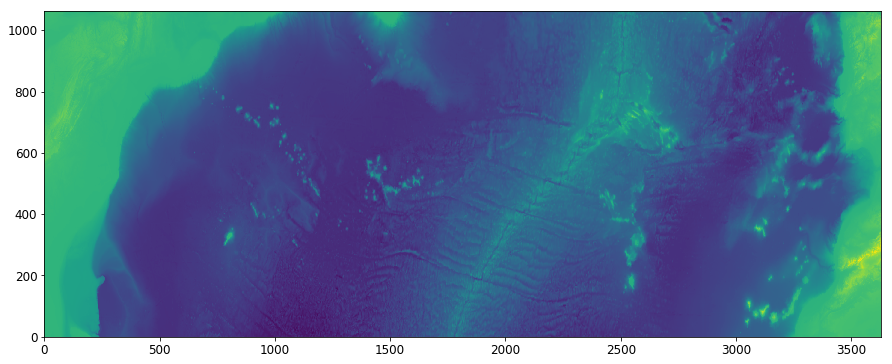

In [165]:
plt.pcolormesh(depth_2km_l)

In [166]:
depth_4km_l[depth_4km_l>0]=0


In [182]:
depth_2km_l[depth_2km_l>0]=0


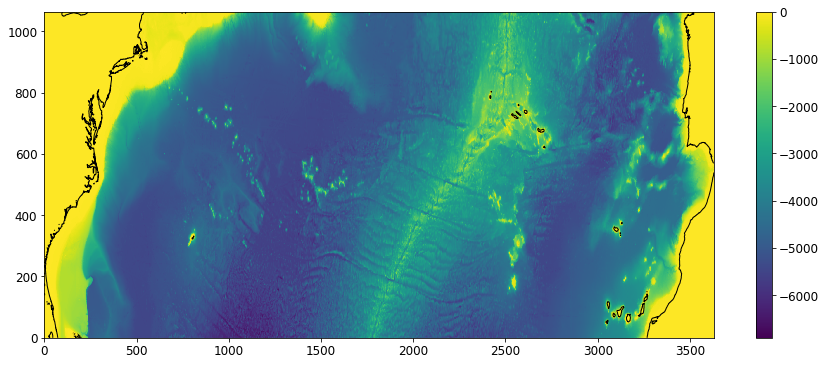

In [198]:
plt.pcolormesh(depth_2km_l);plt.colorbar()
plt.contour(depth_2km_l,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(1,))

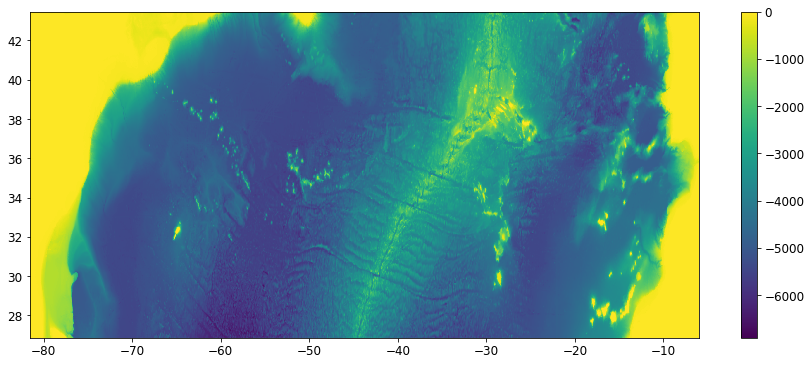

In [197]:
plt.pcolormesh(ds_ll3630.XC.values, ds_ll3630.YC.values, depth_2km_l);plt.colorbar()


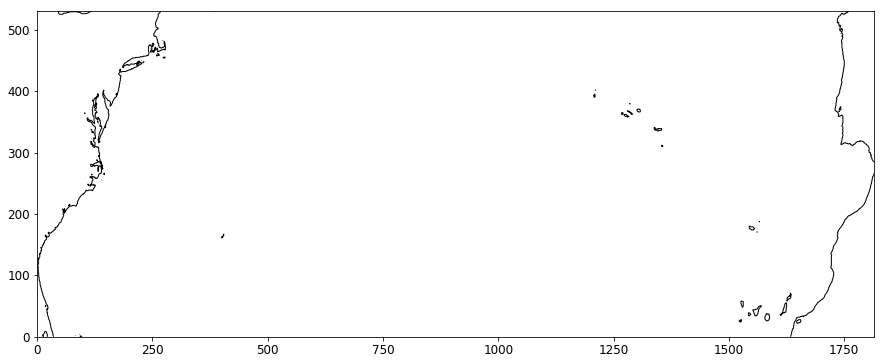

In [200]:
plt.contour(depth_4km_l,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(1,))

In [194]:
np.arange(0,1064,56)

array([   0,   56,  112,  168,  224,  280,  336,  392,  448,  504,  560,
        616,  672,  728,  784,  840,  896,  952, 1008])

In [193]:
np.arange(0,3630,55)

array([   0,   55,  110,  165,  220,  275,  330,  385,  440,  495,  550,
        605,  660,  715,  770,  825,  880,  935,  990, 1045, 1100, 1155,
       1210, 1265, 1320, 1375, 1430, 1485, 1540, 1595, 1650, 1705, 1760,
       1815, 1870, 1925, 1980, 2035, 2090, 2145, 2200, 2255, 2310, 2365,
       2420, 2475, 2530, 2585, 2640, 2695, 2750, 2805, 2860, 2915, 2970,
       3025, 3080, 3135, 3190, 3245, 3300, 3355, 3410, 3465, 3520, 3575])

In [211]:
#dir4km_blank = '/central/groups/oceanphysics/anirban/NA/experiments/ll1815_06/run'
dir4km_blank = '/central/groups/oceanphysics/anirban/grid_06'

ds_1815_b = xmitgcm.open_mdsdataset(dir4km_blank,iters=None,default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/grid_06. Using default version.
  "in %s. Using default version." % data_dir)


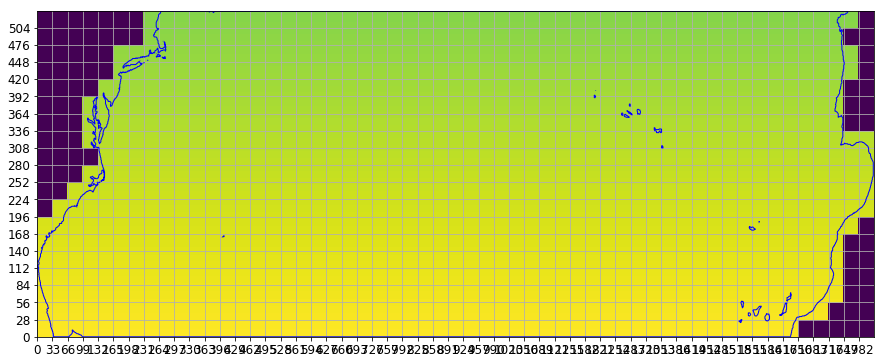

In [215]:
plt.pcolormesh(ds_1815_b.dxC.values)
plt.xticks(np.arange(0,1815,33));
plt.yticks(np.arange(0,532,28));
plt.grid()
plt.contour(ds_1815_b.Depth.values,levels = [-0.5,0.5], colors=('b',),linestyles=('-',),linewidths=(1,))


In [226]:
a = np.array([386,441,496,551,606,661,716,771,826,881,936,991,442])
np.roll(a, -1) - a


array([  55,   55,   55,   55,   55,   55,   55,   55,   55,   55,   55,
       -549,  -56])

In [213]:
496-441

55

In [214]:
441 - 386

55

In [216]:
3630/55

66.0

In [217]:
1064/56

19.0

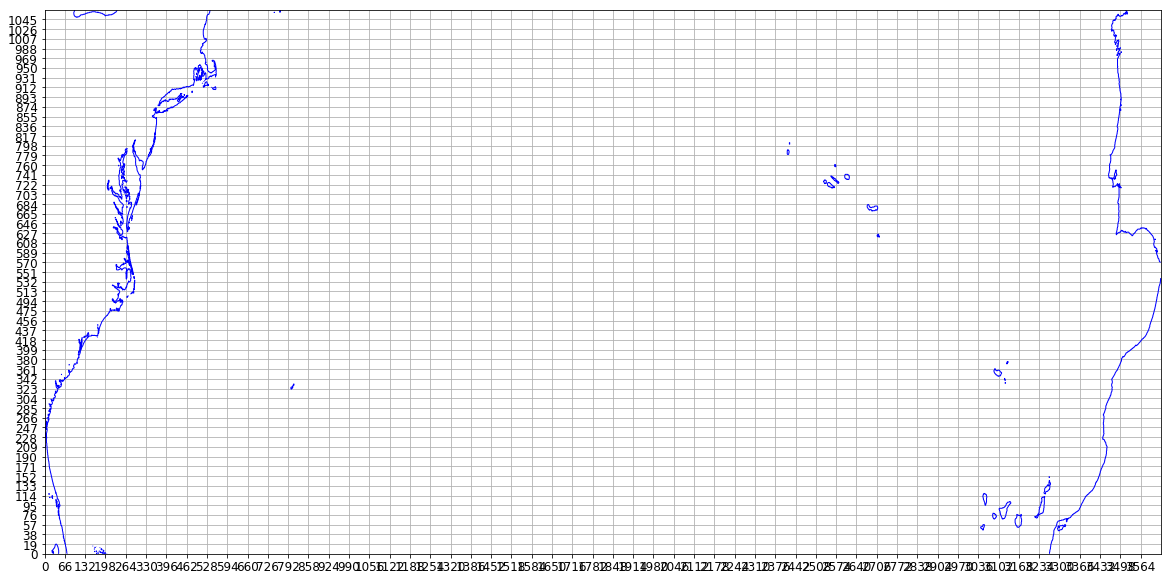

In [227]:
plt.figure(figsize=(20,10))

plt.contour(depth_2km_l,levels = [-0.5,0.5], colors=('b',),linestyles=('-',),linewidths=(1,))
plt.xticks(np.arange(0,3630,66));
plt.yticks(np.arange(0,1064,19));
plt.grid()


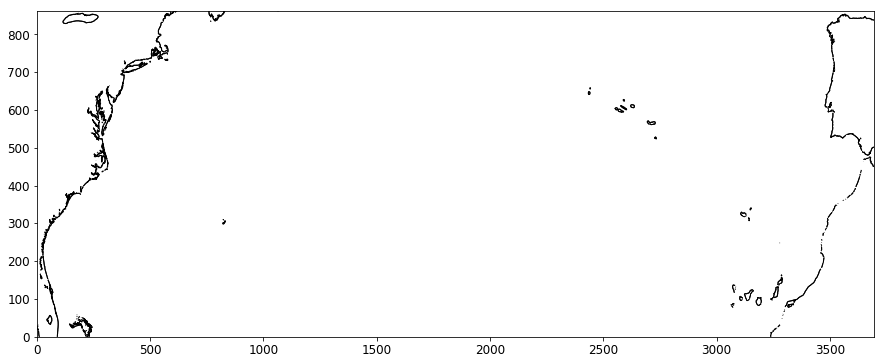

In [191]:
plt.contour(depth_2km,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(1,))

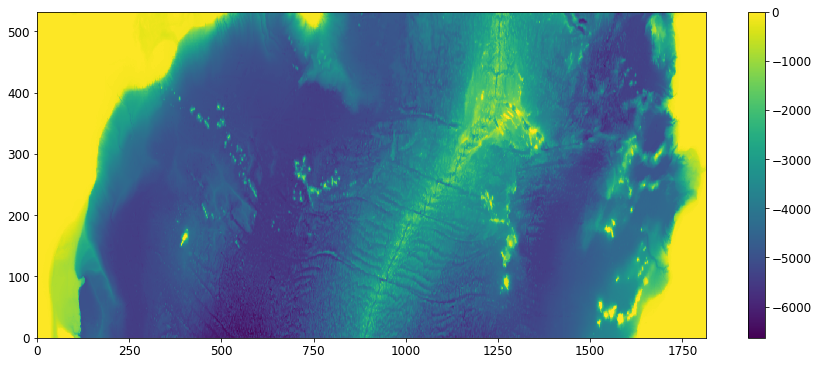

In [167]:
plt.pcolormesh(depth_4km_l);plt.colorbar()

In [171]:
ds_ll1815

<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f4 dask.array<shape

In [178]:
ds_ll3630.dxC.values

array([[2066.24  , 2066.24  , 2066.24  , ..., 2066.24  , 2066.24  ,
        2066.24  ],
       [2065.9277, 2065.9277, 2065.9277, ..., 2065.9277, 2065.9277,
        2065.9277],
       [2065.6155, 2065.6155, 2065.6155, ..., 2065.6155, 2065.6155,
        2065.6155],
       ...,
       [1681.8282, 1681.8282, 1681.8282, ..., 1681.8282, 1681.8282,
        1681.8282],
       [1681.437 , 1681.437 , 1681.437 , ..., 1681.437 , 1681.437 ,
        1681.437 ],
       [1681.0457, 1681.0457, 1681.0457, ..., 1681.0457, 1681.0457,
        1681.0457]], dtype=float32)

In [179]:
ds_ll3630.dyC.values

array([[1732.0985, 1732.0985, 1732.0985, ..., 1732.0985, 1732.0985,
        1732.0985],
       [1899.7407, 1899.7407, 1899.7407, ..., 1899.7407, 1899.7407,
        1899.7407],
       [1899.4755, 1899.4755, 1899.4755, ..., 1899.4755, 1899.4755,
        1899.4755],
       ...,
       [1565.1721, 1565.1721, 1565.1721, ..., 1565.1721, 1565.1721,
        1565.1721],
       [1564.907 , 1564.907 , 1564.907 , ..., 1564.907 , 1564.907 ,
        1564.907 ],
       [1564.5358, 1564.5358, 1564.5358, ..., 1564.5358, 1564.5358,
        1564.5358]], dtype=float32)

In [180]:
ds_ll1815.dxC.values

array([[4132.168 , 4132.168 , 4132.168 , ..., 4132.168 , 4132.168 ,
        4132.168 ],
       [4130.919 , 4130.919 , 4130.919 , ..., 4130.919 , 4130.919 ,
        4130.919 ],
       [4129.6685, 4129.6685, 4129.6685, ..., 4129.6685, 4129.6685,
        4129.6685],
       ...,
       [3365.7798, 3365.7798, 3365.7798, ..., 3365.7798, 3365.7798,
        3365.7798],
       [3364.2153, 3364.2153, 3364.2153, ..., 3364.2153, 3364.2153,
        3364.2153],
       [3362.6504, 3362.6504, 3362.6504, ..., 3362.6504, 3362.6504,
        3362.6504]], dtype=float32)

In [181]:
ds_ll1815.dyC.values

array([[3463.5874, 3463.5874, 3463.5874, ..., 3463.5874, 3463.5874,
        3463.5874],
       [3798.421 , 3798.421 , 3798.421 , ..., 3798.421 , 3798.421 ,
        3798.421 ],
       [3797.3606, 3797.3606, 3797.3606, ..., 3797.3606, 3797.3606,
        3797.3606],
       ...,
       [3131.6165, 3131.6165, 3131.6165, ..., 3131.6165, 3131.6165,
        3131.6165],
       [3130.3442, 3130.3442, 3130.3442, ..., 3130.3442, 3130.3442,
        3130.3442],
       [3129.0718, 3129.0718, 3129.0718, ..., 3129.0718, 3129.0718,
        3129.0718]], dtype=float32)

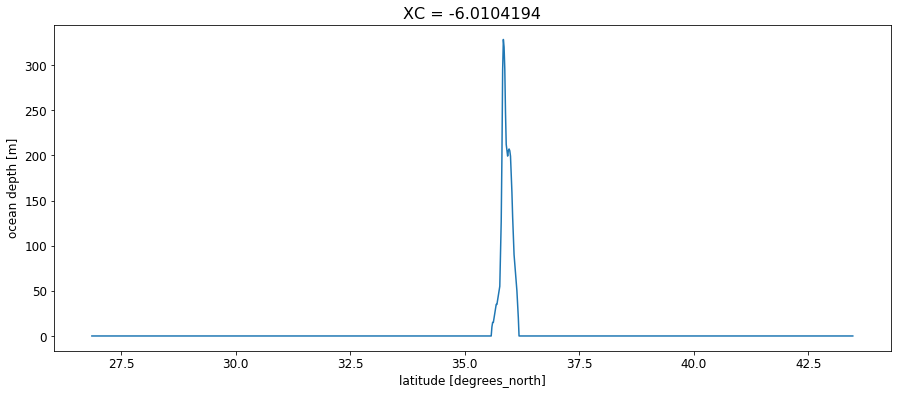

In [176]:
ds_ll3630.Depth[:,-3].plot()

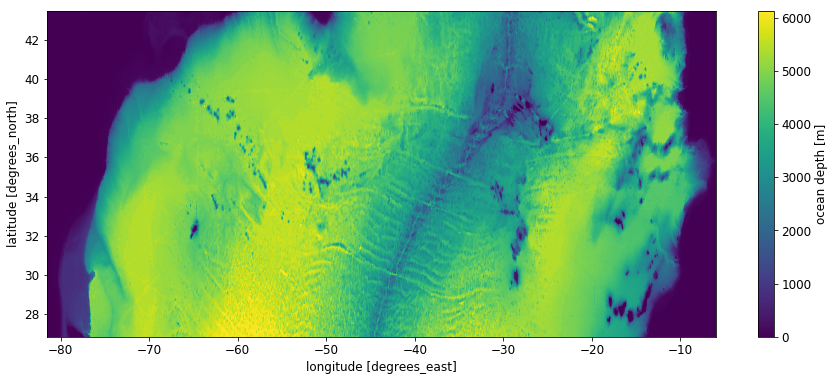

In [173]:
ds_ll3630.Depth.plot()

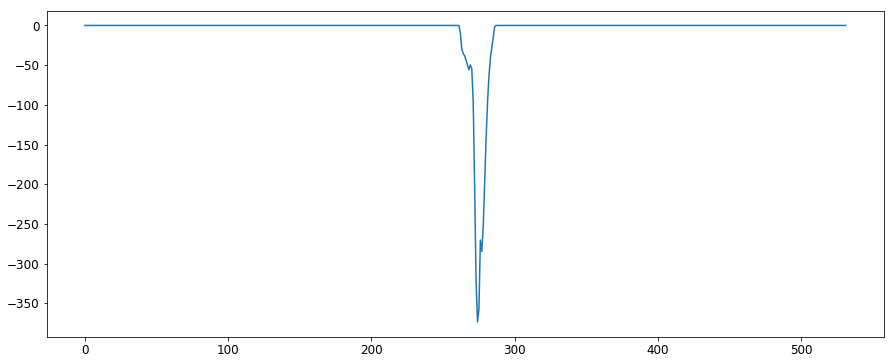

In [170]:
plt.plot(depth_4km_l[:,-3])

In [150]:
depth_4km.shape, depth_orig.shape

((432, 1848), (4320, 18480))

In [156]:
depth_4km[200:230,105:125]

array([[-11.57, -13.8 , -14.74, -15.49, -15.63, -16.43, -17.45, -18.59,
        -18.96, -20.36, -20.97, -21.81, -22.69, -23.19, -24.35, -25.16,
        -25.98, -25.82, -25.39, -25.96],
       [ -0.52,  -9.37, -12.77, -13.68, -14.22, -14.69, -15.59, -16.41,
        -17.55, -18.82, -19.26, -20.21, -21.66, -21.92, -22.56, -23.58,
        -24.88, -25.17, -24.67, -25.7 ],
       [  8.42,   2.86,  -5.21, -11.22, -12.57, -13.2 , -13.52, -14.25,
        -15.68, -17.02, -18.01, -18.67, -19.94, -20.72, -20.78, -21.57,
        -23.53, -24.01, -23.4 , -23.19],
       [ 16.64,  12.72,   6.17,   1.05,  -5.57,  -9.29, -10.77, -12.42,
        -13.21, -14.76, -16.4 , -17.69, -18.1 , -18.71, -19.18, -20.32,
        -21.69, -21.9 , -21.39, -21.53],
       [ 15.53,  18.52,  16.22,   9.76,   6.41,   2.66,  -3.37,  -6.61,
        -10.64, -13.11, -15.08, -16.33, -16.89, -17.15, -17.72, -18.62,
        -19.42, -19.62, -19.71, -20.67],
       [ 13.85,  16.17,  17.98,  14.37,    nan,    nan,   1.18,   4.92,
   

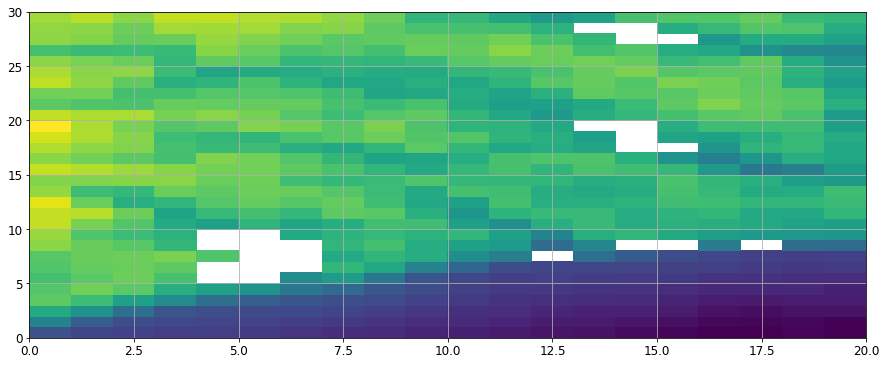

In [155]:
plt.pcolormesh(depth_4km[200:230,105:125])
plt.grid()

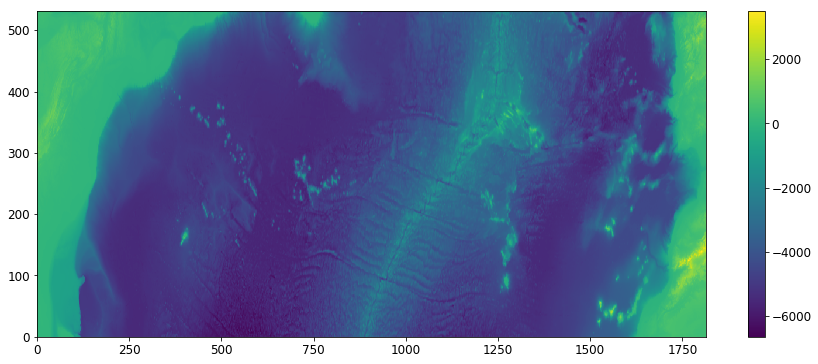

In [159]:
plt.pcolormesh(depth_4km_l);plt.colorbar()

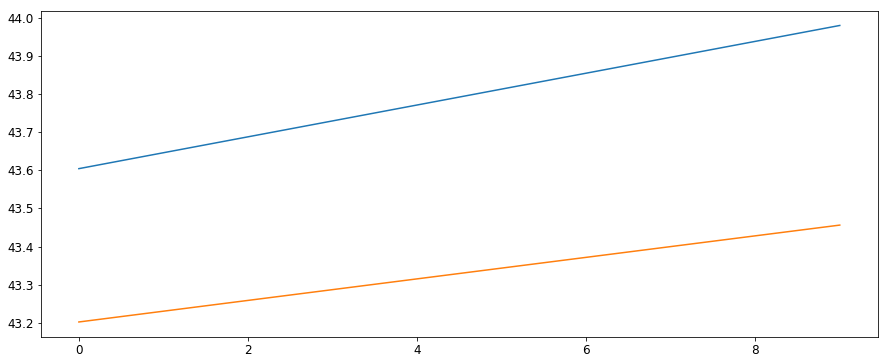

In [141]:
plt.plot(y_4km[-10:])
plt.plot(ds_ll1815.YC.values[-10:])

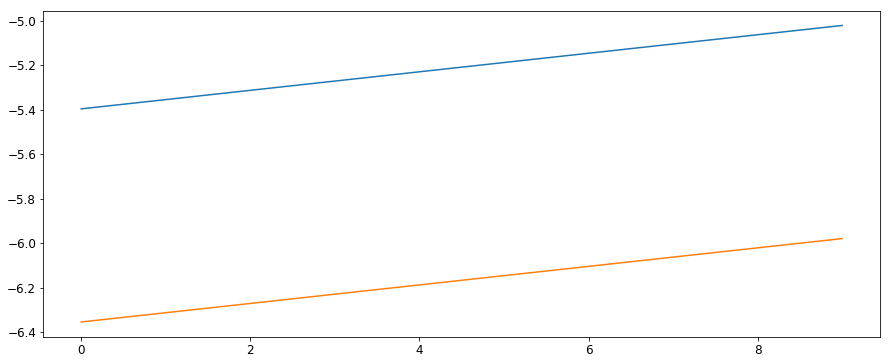

In [140]:
plt.plot(x_4km[-10:])
plt.plot(ds_ll1815.XC.values[-10:])

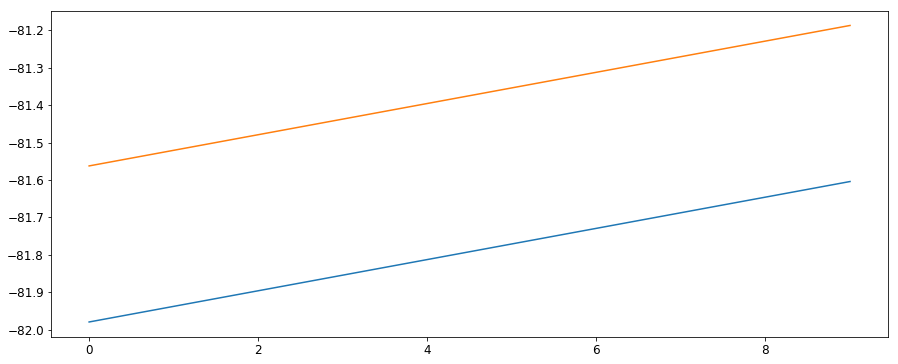

In [139]:
plt.plot(x_4km[0:10])
plt.plot(ds_ll1815.XC.values[0:10])

In [13]:
1/24

0.041666666666666664

In [21]:
lat = 26.855293273925781
lat = ds_ll1815.YC.max().values
dX = 1/24
dY = dX*np.cos(np.deg2rad(lat))
dY

0.03024579087893168

In [19]:
lat+dY/2

26.87387973816848

In [20]:
ds_ll1815.YC.min().values

array(26.87238, dtype=float32)

In [22]:
dY = dX*np.cos(np.deg2rad(ds_ll1815.YC.values))

In [43]:
dY2 = dX/np.cos(np.deg2rad(ds_ll1815.YC.mean().values))*np.ones_like(dY)

In [45]:
dY.shape, delY.shape, dY2.shape

((532,), (532,), (532,))

In [34]:
ds_ll1815.YG.min().values + np.sum(delY)

43.470387

In [35]:
ds_ll1815.YG.min().values + np.sum(dY)

44.853317

In [37]:
ds_ll1815.YC.max()

<xarray.DataArray 'YC' ()>
array(43.456318, dtype=float32)

Text(1,0.0285,'$\\Delta \\lambda = 1/24 = 0.04167 =$ delX in data')

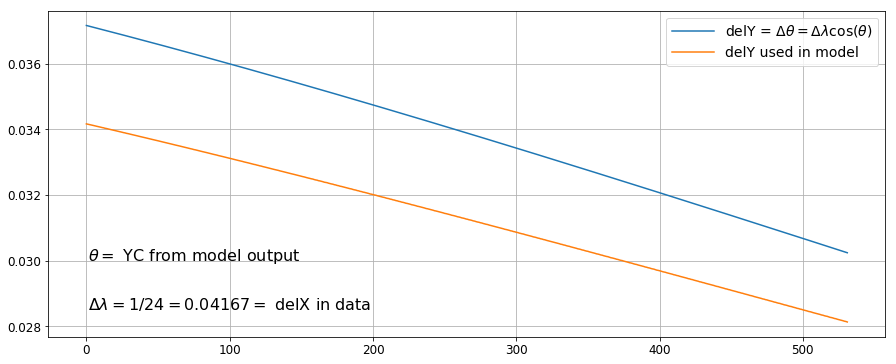

In [48]:
plt.plot(dY, label= r'delY = $\Delta \theta  = \Delta \lambda \cos(\theta)$')
#plt.plot(dY, label= r'delY = $\Delta \theta  = \Delta \lambda \cos(\theta)$')
plt.plot(delY, label = 'delY used in model')
plt.grid()
plt.legend()
plt.text(1,0.030, r'$\theta = $ YC from model output')
plt.text(1,0.0285, r'$\Delta \lambda = 1/24 = 0.04167 =$ delX in data')


In [40]:
ds_ll1815.YC.mean().values

array(35.43229, dtype=float32)

In [42]:
ds_ll1815.YC.values.mean()

35.43229

In [12]:
lati = np.arange(26,44,1/24)
dely = 111321/24*np.cos(np.radians(lati))


In [25]:
delydir = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'
f = open(delydir+'delYFile', 'rb')
delY = np.fromfile(f, '>f4')

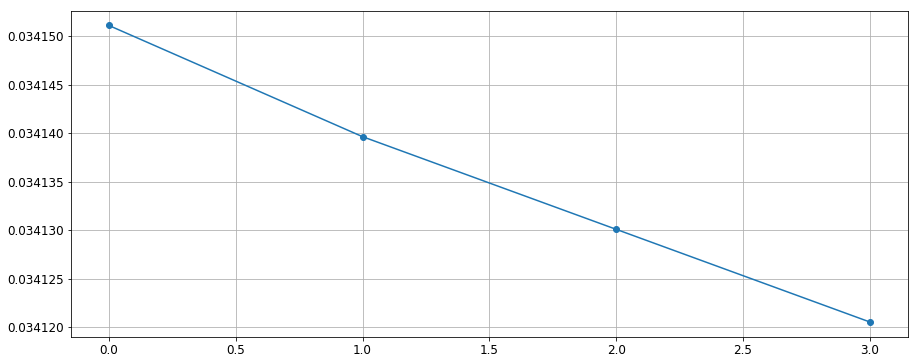

In [102]:
plt.plot(delY[2:6],'o-')
plt.grid()

In [105]:
yc = ds_ll1815.YC.values
dyc = delY



In [85]:
111170/24*np.cos(np.deg2rad(26.855293273925781))

4132.514459721573

In [73]:
111132.954/24*np.cos(np.deg2rad(26.855293273925781))

4131.137351412904

In [86]:
np.rad2deg(111170/24*np.cos(np.deg2rad(26.855293273925781))/6.371e6)

0.0371645954039918

In [98]:
np.rad2deg(110000/24*np.cos(np.deg2rad(26.855293273925781))/6.4e6)

0.03660682977797447

In [88]:
np.rad2deg(6.357e6*2*np.pi/360/24*np.cos(np.deg2rad(26.855293273925781))/6.371e6)

0.037091242565008335

In [90]:
26.855293273925781 + 0.5*np.rad2deg(6.357e6*2*np.pi/360/24*np.cos(np.deg2rad(26.855293273925781))/6.371e6)

26.873838895208287

In [91]:
np.rad2deg(6.357e6*2*np.pi/360/24*np.cos(np.deg2rad(26.873838895208287))/6.371e6)

0.03708516152000433

In [95]:
delY[100]

0.033123016

In [58]:
ds_ll1815.dxG.values[0]

array([4132.7925, 4132.7925, 4132.7925, ..., 4132.7925, 4132.7925,
       4132.7925], dtype=float32)

In [87]:
6.357e6*2*np.pi/360

110950.58054927952

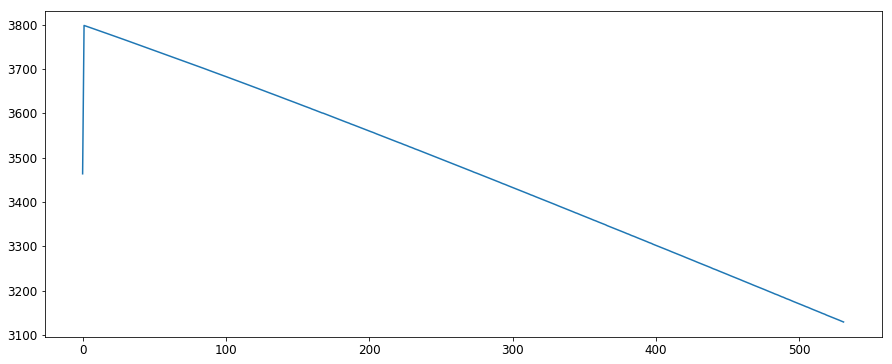

In [39]:
plt.plot(ds_ll1815.dyC.values[:,100])

In [ ]:
ds

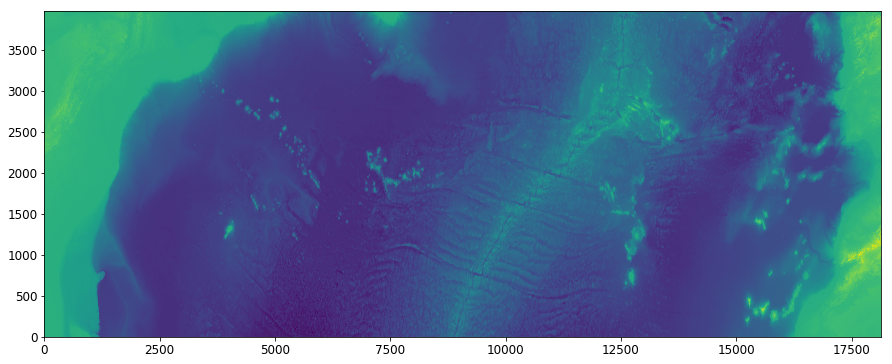

In [18]:
plt.pcolormesh(depth_orig)

In [17]:
depth_orig.shape

(3985, 18145)

In [11]:
x0 = ds_topo_sel.lon.values
y0 = ds_topo_sel.lat.values

x_1815 = ds_ll1815.XC.values
y_1815 = ds_ll1815.YC.values

In [21]:
f_dep = interp2d(x0,y0, depth_orig, kind='linear', copy=True, fill_value=None)     

In [22]:
depth_1 = f_dep(y_1815, x_1815)

In [23]:
depth_1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


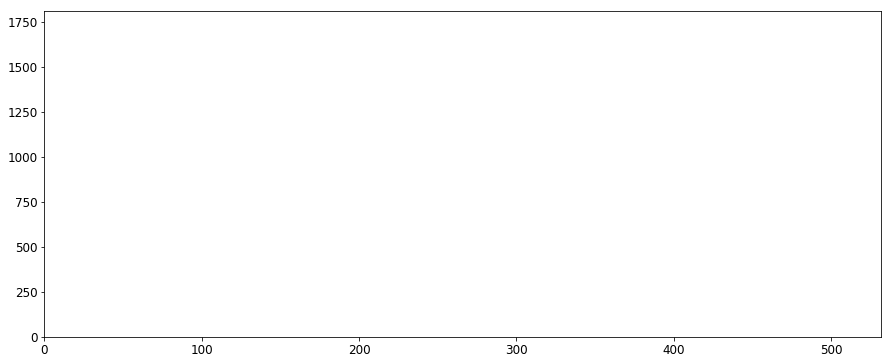

In [16]:
plt.pcolormesh(depth_1)

In [28]:
coarseness = 10

shape = np.array(depth_orig.shape, dtype=float)
new_shape = coarseness * np.ceil(shape / coarseness).astype(int)
new_shape

array([ 3990, 18150])

In [31]:
depth_fine.shape, depth_orig.shape

((3990, 18150), (3985, 18145))

In [33]:
shape

array([ 3985., 18145.])

In [34]:
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
depth_10 = np.sum(temp, axis=(1,3))

In [36]:
depth_10.shape

(399, 1815)

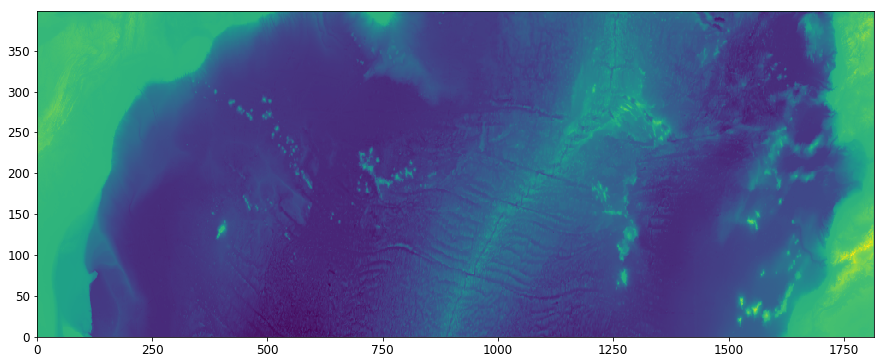

In [37]:
plt.pcolormesh(depth_10)

In [52]:
coarseness = 5

shape = np.array(depth_orig.shape, dtype=float)
new_shape = (coarseness * np.ceil(shape / coarseness)).astype(int)
# Create the zero-padded array and assign it with the old density
depth_fine = np.zeros(new_shape)
depth_fine[:int(shape[0]), :int(shape[1])] = depth_orig

# Now use the same method as before
temp = depth_fine.reshape((new_shape[0] // coarseness, coarseness,
                               new_shape[1] // coarseness, coarseness))
depth_5 = np.sum(temp, axis=(1,3))

In [53]:
depth_5.shape

(797, 3629)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [29]:
ds_ll1815.dyC.values

array([[3463.5874, 3463.5874, 3463.5874, ..., 3463.5874, 3463.5874,
        3463.5874],
       [3798.421 , 3798.421 , 3798.421 , ..., 3798.421 , 3798.421 ,
        3798.421 ],
       [3797.3606, 3797.3606, 3797.3606, ..., 3797.3606, 3797.3606,
        3797.3606],
       ...,
       [3131.6165, 3131.6165, 3131.6165, ..., 3131.6165, 3131.6165,
        3131.6165],
       [3130.3442, 3130.3442, 3130.3442, ..., 3130.3442, 3130.3442,
        3130.3442],
       [3129.0718, 3129.0718, 3129.0718, ..., 3129.0718, 3129.0718,
        3129.0718]], dtype=float32)

In [24]:
from scipy.interpolate import RectBivariateSpline


In [25]:
interp_spline = RectBivariateSpline(y0, x0, depth_orig)

In [26]:
xx, yy = np.meshgrid(x_1815, y_1815)
xx.shape, yy.shape

((532, 1815), (532, 1815))

In [28]:
xx_0, yy_0 = np.meshgrid(x0,y0)
xx_0.shape, yy_0.shape

((3985, 18145), (3985, 18145))

In [29]:
data = depth_orig.ravel()
xpts = xx_0.ravel()
ypts = yy_0.ravel()
    

In [ ]:
depth3 = griddata((xpts, ypts), data, (xx,yy), method='linear')

In [27]:
depth_2 = interp_spline(yy, xx)

MemoryError: 